In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the red-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/faithful.csv"
df = pd.read_csv(path)



Problem 1

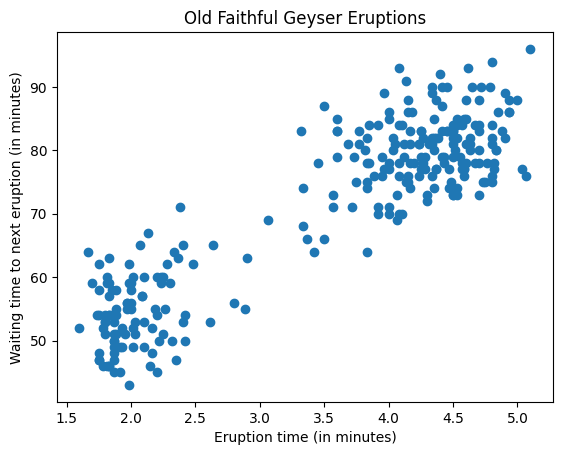

In [4]:
import matplotlib.pyplot as plt
# Plot eruption time versus waiting time
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption time (in minutes)')
plt.ylabel('Waiting time to next eruption (in minutes)')
plt.title('Old Faithful Geyser Eruptions')
plt.show()

Problem 1)
B) A cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other clusters. From the plot, we can observe 2 CLUSTERS


Problem 1)
C) Hierarchical clustering aims to create an ordered set of clusters by either combining small clusters into bigger ones or dividing large clusters into smaller ones. The hierarchical clustering algorithm's basic stages are as follows:

Considering each data point as a separate cluster and a distance metric, such as the Euclidean distance, Manhattan distance, or cosine similarity, to determine the pairwise distance between each pair of clusters.

Creating a single cluster by combining the two nearby clusters. Depending on the linking criterion used, such as total linkage, single linkage, or average linkage, the distance between each of the other clusters and the new cluster is determined.

Repeat the previous step until all data points belong to a single cluster. Without knowing more about the data, it is difficult to say if hierarchical clustering would be appropriate for this dataset based on the scatter plot.

In order to find subsets within a dataset and investigate interactions between variables, hierarchical clustering can be helpful. However, if the data is noisy or the clusters are not well-defined, it may not be the best option. 

The final clusters can also be significantly influenced by the choice of distance metric and linking criteria. It's crucial to take into consideration the benefits and drawbacks of hierarchical clustering to the research issue and dataset being examined.

Problem 2

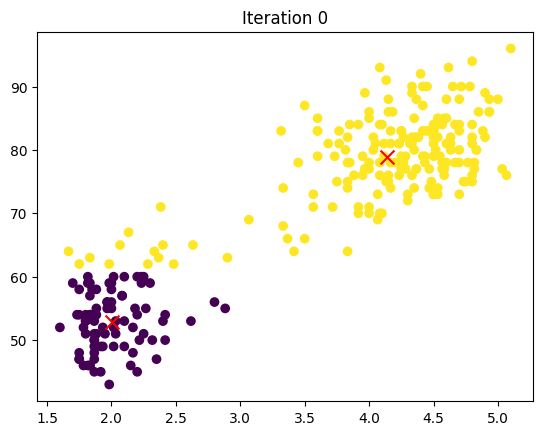

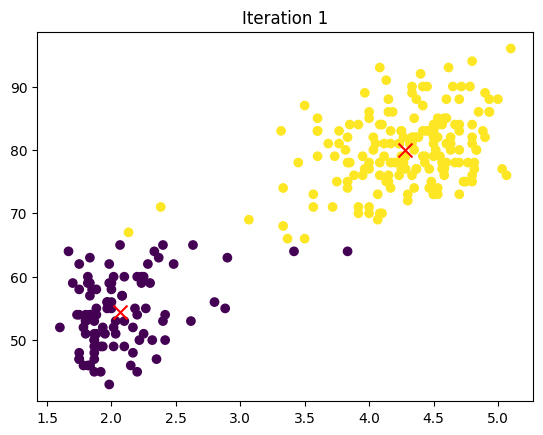

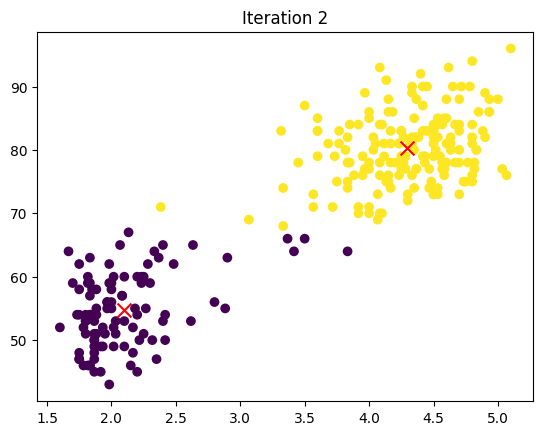

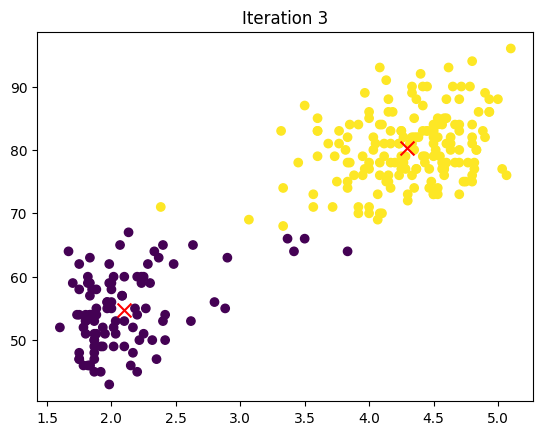

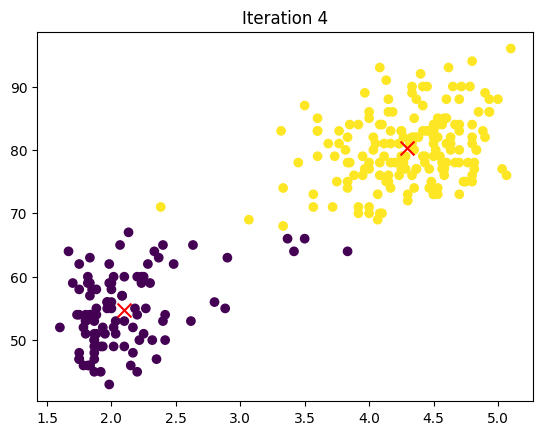

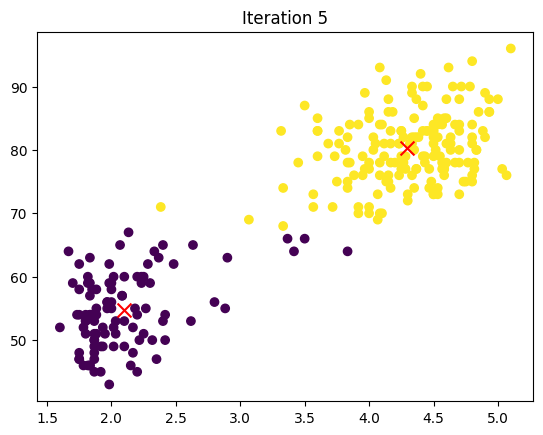

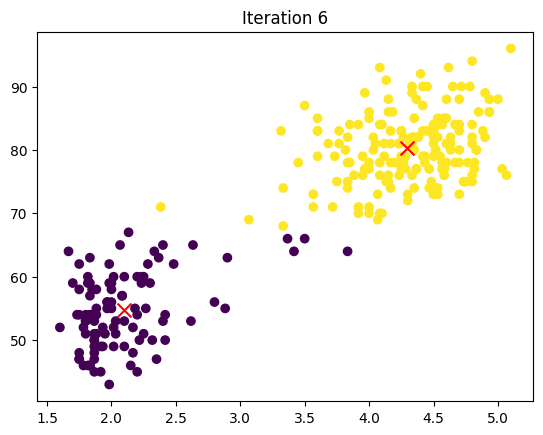

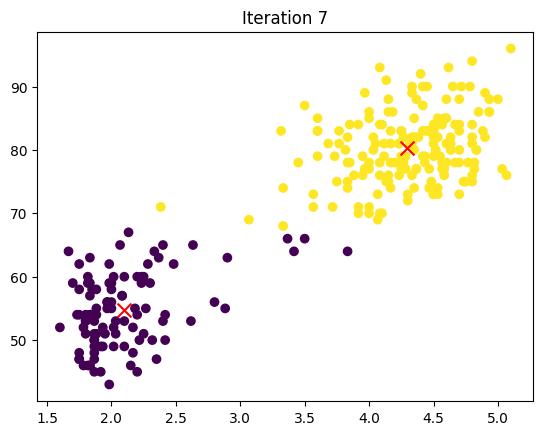

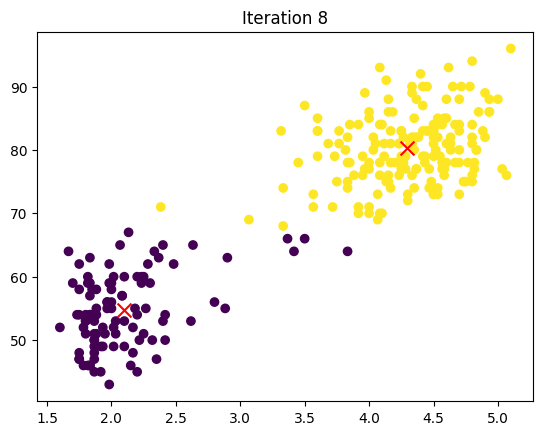

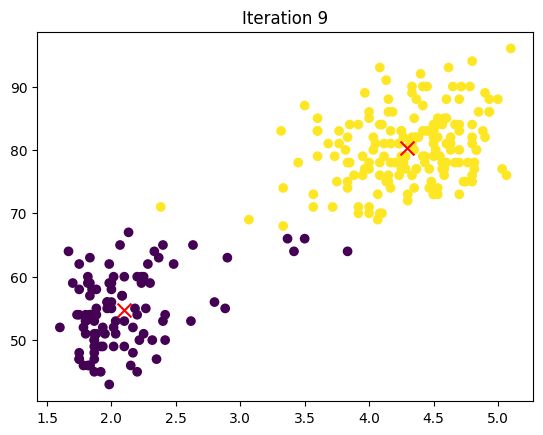

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the eruption time and waiting time columns
X = np.array(df[['eruptions', 'waiting']])

# Set the number of clusters
k = 2

# Initialize the cluster centers randomly
centers = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(k, X.shape[1]))

# Loop until convergence
for i in range(10):
    # Assign each data point to its nearest cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update the cluster centers as the mean of the assigned data points
    for j in range(k):
        centers[j] = np.mean(X[labels == j], axis=0)

    # Plot the current cluster assignments and centers
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
    plt.title('Iteration {}'.format(i))
    plt.show()

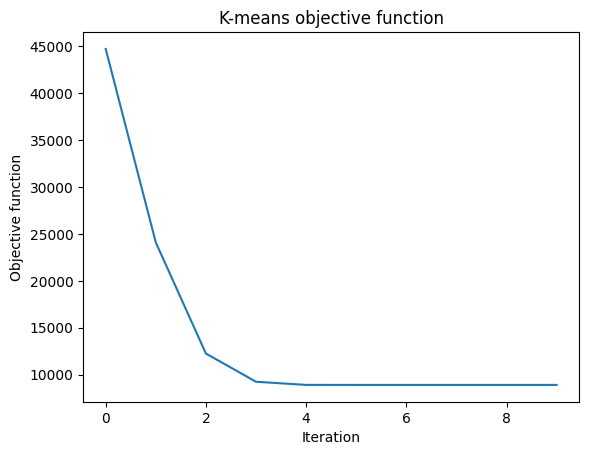

In [7]:
# Extract the eruption time and waiting time columns
X = np.array(df[['eruptions', 'waiting']])

# Set the number of clusters
k = 2

# Initialize the cluster centers randomly
centers = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(k, X.shape[1]))

# Initialize the objective function list
obj_list = []

# Loop until convergence
for i in range(10):
    # Assign each data point to its nearest cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update the cluster centers as the mean of the assigned data points
    for j in range(k):
        centers[j] = np.mean(X[labels == j], axis=0)

    # Compute the objective function
    obj = np.sum(distances[np.arange(len(labels)), labels]**2)
    obj_list.append(obj)

# Plot the objective function versus iterations
plt.plot(obj_list)
plt.xlabel('Iteration')
plt.ylabel('Objective function')
plt.title('K-means objective function')
plt.show()

Problem 2)

D) Yes, this method helped us to find the clusters identified in Problem 1.